# Economic Data Analysis | Day 1 Demo

Let's get to know the class!

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#file_path = 'https://tayweid.github.io/econ-0150/concepts/concept-0/data/'
file_path = 'data/'

## Load The Data

In [46]:
data = pd.read_csv(file_path + 'Fall_2025_Survey.csv')
data.head()

,Timestamp,First and Last Initials (eg. Taylor Weidman -> TW),When is your birthday?,What is your favorite color?,Approximately how many miles away from Pittsburgh is your hometown?,What is your (primary) major?,How much did you like your statistics class?,How excited are you for this class?,Do you feel confident in Excel?,How confident do you feel in python?
0,2025/08/26 1:03:40 PM AST,JC,2003-10-12,Blue,400,Accounting,7,9,Yes,10
1,2025/08/26 1:48:49 PM AST,TL,2003-06-06,Blue,16,Other,7,7,No,5
2,2025/08/26 1:49:32 PM AST,LT,2005-07-06,Green,300,Data Science,9,8,Yes,9
3,2025/08/26 1:50:09 PM AST,KM,2004-10-04,Blue,300,Computer Science,8,9,Yes,8
4,2025/08/26 1:50:18 PM AST,DC,2006-09-09,Melon Green,400,Finance,9,10,Yes,9


## Birthday

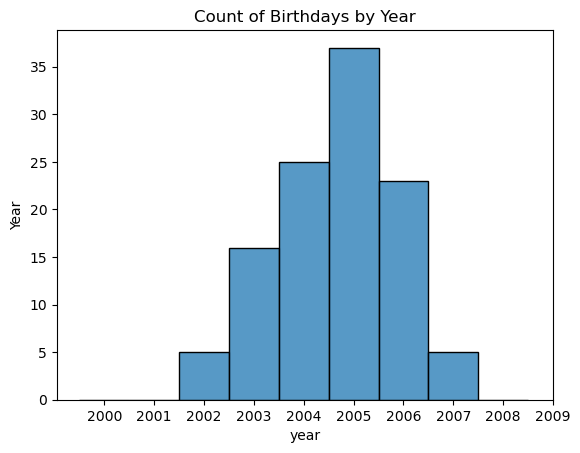

In [30]:
# Extract year for binning
data['date'] = pd.to_datetime(data['When is your birthday?'])
data['year'] = data['date'].dt.year

# Create the plot
bins = np.arange(2000,2010,1)
sns.histplot(data=data, x='year', bins=bins-0.5)
plt.title('Count of Birthdays by Year')
plt.xticks(bins)
plt.ylabel('Year');

## Favorite Color

In [31]:
data['What is your favorite color?'].value_counts()

What is your favorite color?
Blue                                                 24
Purple                                               12
Green                                                11
Red                                                   8
blue                                                  5
purple                                                4
yellow                                                4
pink                                                  4
orange                                                3
Light Blue                                            3
green                                                 3
Pink                                                  3
Yellow                                                3
Black                                                 3
red                                                   2
Blue                                                  2
Black (if that doesn’t count then probably green)     1
Greeen             

In [42]:
color_mapping = {
    # Standardize capitalization
    'blue': 'Blue',
    'purple': 'Purple', 
    'green': 'Green',
    'red': 'Red',
    'yellow': 'Yellow',
    'pink': 'Pink',
    'orange': 'Orange',
    'black': 'Black',
    
    # Fix typos
    'Greeen': 'Green',
    
    # Group light/dark variations with main color
    'Light Blue': 'Blue',
    'Dark blue': 'Blue',
    'Navy blue': 'Blue', 
    'Navy Blue': 'Blue',
    'Baby Blue': 'Blue',
    
    'Dark Green': 'Green',
    'Dark green': 'Green', 
    'dark green': 'Green',
    'Melon Green': 'Green',  # Assuming this is a green shade
    
    'Deep Red': 'Red',
    
    # Standardize other colors
    'white': 'White',
    'Grey': 'Gray',  # or keep as 'Grey' if you prefer
    'Gold': 'Yellow',  # Gold is yellowish
    
    # Handle the complex answer - they said green as backup
    'Black (if that doesn’t count then probably green)': 'Black',
}

In [43]:
# Apply the mapping
data['Favorite color?'] = data['What is your favorite color?'].replace(color_mapping)
data['Favorite color?'].value_counts()

Favorite color?
Blue           36
Green          18
Purple         16
Red            11
Yellow          8
Pink            7
Black           5
Orange          4
Blue            2
White           1
dark green      1
Red             1
Dark Green      1
Pink            1
Gray            1
Name: count, dtype: int64

## Hometown Distance

In [47]:
data['Approximately how many miles away from Pittsburgh is your hometown?'].value_counts()

Approximately how many miles away from Pittsburgh is your hometown?
300          8
25           5
250          5
20           5
200          5
            ..
16           1
289          1
26           1
300 miles    1
8            1
Name: count, Length: 71, dtype: int64

In [48]:
data['distance_clean'] = data['Approximately how many miles away from Pittsburgh is your hometown?'].str.extract(r'(\d+(?:\.\d+)?)', expand=False).astype(float)

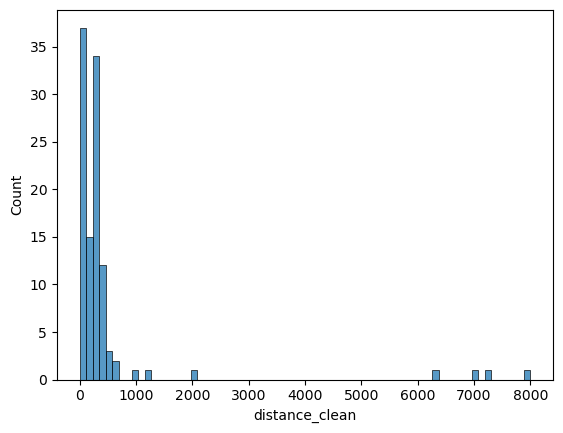

In [51]:
sns.histplot(x='distance_clean', data=data);

## Primary Major?

In [52]:
data['What is your (primary) major?'].value_counts()

What is your (primary) major?
Economics               46
Other                   21
Finance                 16
Computer Science         8
Biology                  6
Psychology               4
Political Science        4
Neuroscience             3
Accounting               1
Data Science             1
Marketing                1
Chemistry                1
Computer Engineering     1
Name: count, dtype: int64

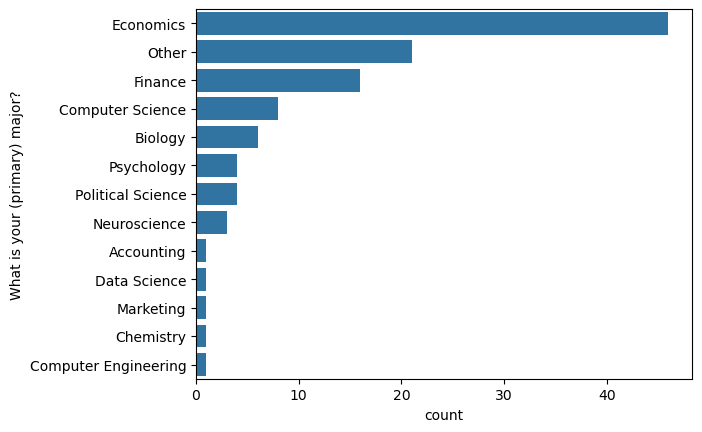

In [55]:
order = data['What is your (primary) major?'].value_counts().index
sns.countplot(data=data, y='What is your (primary) major?', order=order);

## Statistics

<Axes: xlabel='How much did you like your statistics class?', ylabel='Count'>

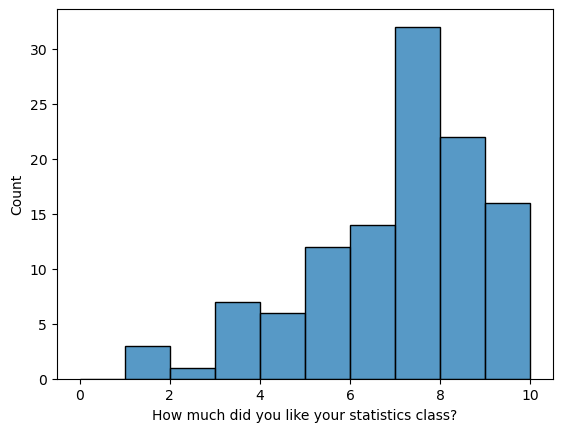

In [60]:
sns.histplot(x='How much did you like your statistics class?', data=data, bins=range(0,11,1))

## Statistics and Economic Data Analysis

<Axes: xlabel='How much did you like your statistics class?', ylabel='How excited are you for this class?'>

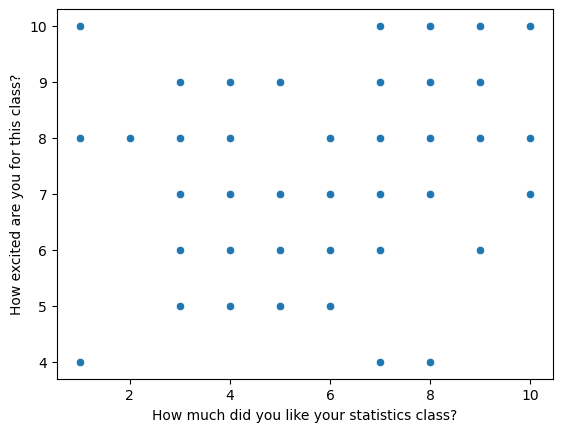

In [61]:
sns.scatterplot(data=data, x='How much did you like your statistics class?', y='How excited are you for this class?')

Text(0, 0.5, 'How excited are you for this class?')

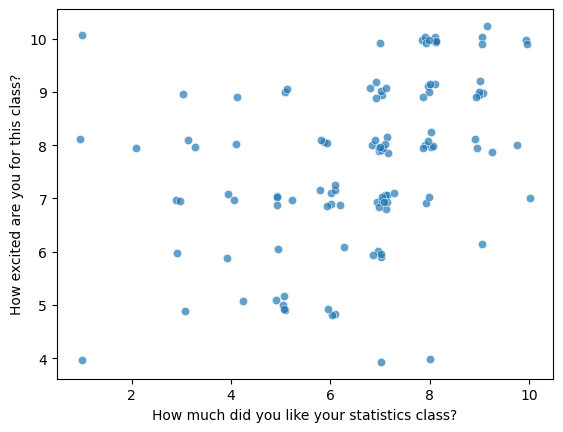

In [66]:
x_jitter = data['How much did you like your statistics class?'] + np.random.normal(0, 0.1, len(data))
y_jitter = data['How excited are you for this class?'] + np.random.normal(0, 0.1, len(data))

sns.scatterplot(x=x_jitter, y=y_jitter, alpha=0.7)
plt.xlabel('How much did you like your statistics class?')
plt.ylabel('How excited are you for this class?')

## Economic Data and Excel

<Axes: xlabel='count', ylabel='Do you feel confident in Excel?'>

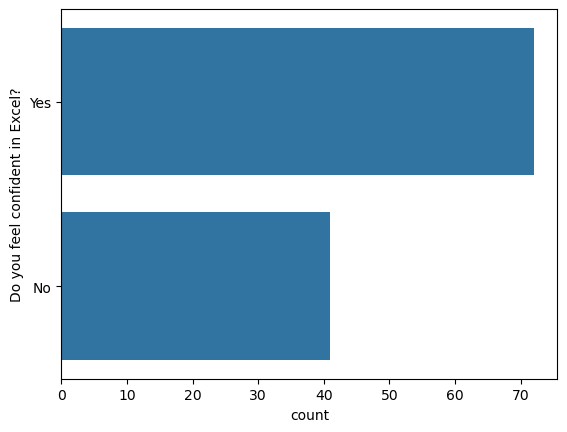

In [75]:
sns.countplot(data=data, y='Do you feel confident in Excel?')

<Axes: xlabel='How excited are you for this class?', ylabel='Do you feel confident in Excel?'>

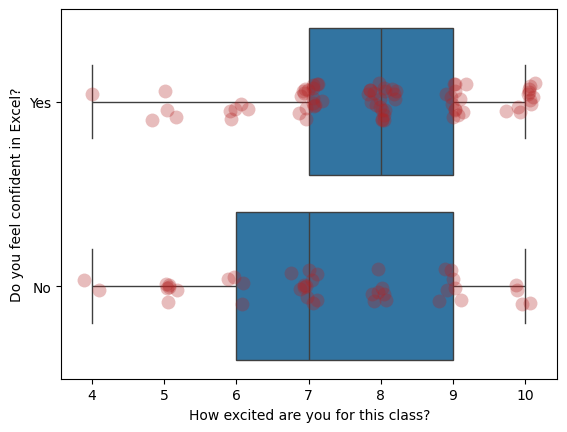

In [95]:
# Boxplot for summary
sns.boxplot(data=data, y='Do you feel confident in Excel?', 
            x='How excited are you for this class?')

# Stripplot with manual x jitter
x_jittered = data['How excited are you for this class?'] + np.random.normal(0, 0.1, len(data))
sns.stripplot(y=data['Do you feel confident in Excel?'], 
              x=x_jittered,
              color='firebrick',
              alpha=0.3, s=10)

## Economic Data and Python

<Axes: >

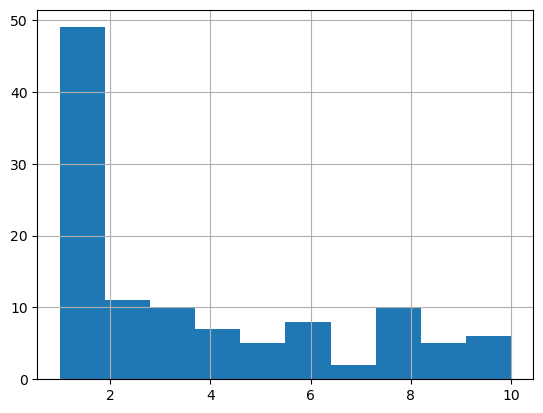

In [67]:
data['How confident do you feel in python?'].hist()

Text(0, 0.5, 'How excited are you for this class?')

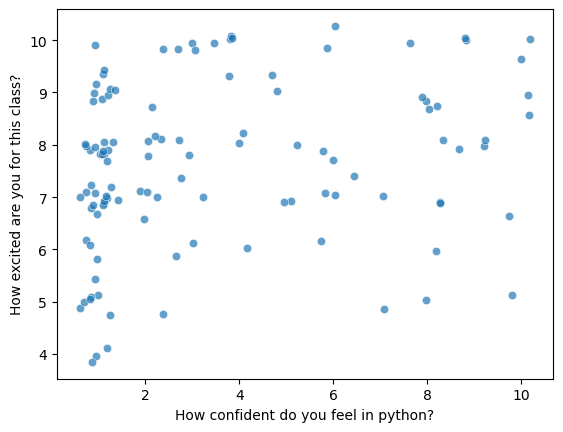

In [96]:
x_jitter = data['How confident do you feel in python?'] + np.random.normal(0, 0.2, len(data))
y_jitter = data['How excited are you for this class?'] + np.random.normal(0, 0.2, len(data))

sns.scatterplot(x=x_jitter, y=y_jitter, alpha=0.7)
plt.xlabel('How confident do you feel in python?')
plt.ylabel('How excited are you for this class?')